In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r'data/total_dataset.csv', low_memory=False)

In [45]:
df['Time'] = pd.to_datetime(df['Time'])

In [46]:
df.columns

Index(['Time', 'Tmp', 'TmpMax', 'TmpMin', 'TmpMinMaxLoc', 'VCell', 'VCellMax',
       'VCellMin', 'VCellMinMaxLoc', 'A', 'AChaMax', 'ADisChaMax', 'EvtVnd1',
       'EvtVnd2', 'EvtVnd3', 'SoC', 'V', 'W', 'WChaMax', 'WDisChaMax',
       'Racks'],
      dtype='object')

In [48]:
df

,Time,Tmp,TmpMax,TmpMin,TmpMinMaxLoc,VCell,VCellMax,VCellMin,VCellMinMaxLoc,A,...,ADisChaMax,EvtVnd1,EvtVnd2,EvtVnd3,SoC,V,W,WChaMax,WDisChaMax,Racks
0,2019-01-01 00:00:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.456,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
1,2019-01-01 00:01:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.400,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
2,2019-01-01 00:02:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
3,2019-01-01 00:03:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
4,2019-01-01 00:04:00,26.5,29.0,24.5,"{'max': 31, 'min': 2}",3.435,3.456,3.400,"{'max': 10, 'min': 168}",0.0,...,120.4,NaN,NaN,NaN,4.5,817.7,0.0,121800.0,98500.0,racks_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280355,2019-11-22 16:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280356,2019-11-22 16:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280357,2019-11-22 16:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280358,2019-11-22 16:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13


In [47]:
start = pd.Timestamp('2019-01-18 00:00:00')
end   = pd.Timestamp('2019-01-19 00:00:00')

In [32]:
target = ['Time', 'Tmp', 'TmpMax', 'TmpMin', 'VCell', 'VCellMax', 'VCellMin', 'AChaMax', 'ADisChaMax', 'SoC']

In [33]:
temp_df = df[(start <= df['Time']) & (df['Time'] < end) & (df['Racks'] == 'racks_0')].loc[:, target]

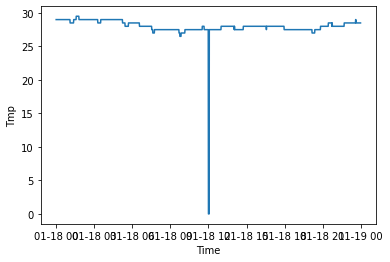

In [35]:
sns.lineplot(data=temp_df.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp')

plt.show()

In [36]:
temp_df = temp_df.replace(np.float64(0.0), np.NAN)

In [37]:
for i in temp_df.columns[1:]:
    temp_df[i] = pd.Series(temp_df[i]).interpolate()

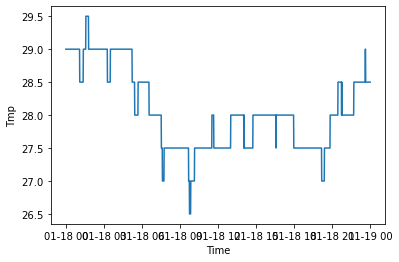

In [38]:
sns.lineplot(data=temp_df.loc[:, ['Time', 'Tmp']], x='Time', y='Tmp')

plt.show()

In [41]:
df[df['Racks'] == 'racks_0'].loc[temp_df.index[0]:temp_df.index[-1], target] = temp_df

C:\Users\82109\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [42]:
df

,Time,Tmp,TmpMax,TmpMin,TmpMinMaxLoc,VCell,VCellMax,VCellMin,VCellMinMaxLoc,A,...,ADisChaMax,EvtVnd1,EvtVnd2,EvtVnd3,SoC,V,W,WChaMax,WDisChaMax,Racks
0,2019-01-01 00:00:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.456,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
1,2019-01-01 00:01:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.400,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
2,2019-01-01 00:02:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
3,2019-01-01 00:03:00,27.0,29.0,25.0,"{'max': 31, 'min': 2}",3.435,3.455,3.401,"{'max': 2, 'min': 168}",0.0,...,128.9,NaN,NaN,NaN,4.5,817.6,0.0,121800.0,105400.0,racks_0
4,2019-01-01 00:04:00,26.5,29.0,24.5,"{'max': 31, 'min': 2}",3.435,3.456,3.400,"{'max': 10, 'min': 168}",0.0,...,120.4,NaN,NaN,NaN,4.5,817.7,0.0,121800.0,98500.0,racks_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280355,2019-11-22 16:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280356,2019-11-22 16:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280357,2019-11-22 16:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
5280358,2019-11-22 16:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,racks_13
